# Using the EXBA tools

This notebook shows how to use the tools available in the EXBA class.
It uses the `lightkurve` package as base.

In [71]:
import os, sys, glob
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import lightkurve as lk

%matplotlib inline
path = os.path.dirname(os.getcwd()) 

sys.path.append(path)
from exba import EXBA, EXBACollection

%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## EXBA object

Create and EXBA object for a given Kepler channel and quarter by combining the 4 TPFs available per channel.

The EXBA object has the following attributes:
* tpfs: A TPFCollection of the original data
* time: an array with the JD of observation
* row: arrays with coordinates in pixel space
* col: arrays with coordinates in pixel space
* ra: arrays with coordinates in world space
* dec: arrays with coordinates in world space
* flux: array with flux values per pixel
* sources: list of (clean) Gaia sources present in the images

# Using multiple quarters

To compute light curves of multiple quarters for a given channel, first we create a list of EXBA objects for all quarters available in the dataset.

We can plot the images in WCS space

In [12]:
exbas = [EXBA(channel=53, quarter=q) for q in [5,6,9,10,13,14,17]]

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


[<AxesSubplot:xlabel='R.A. [deg]', ylabel='Dec [deg]'>,
 <AxesSubplot:xlabel='R.A. [deg]', ylabel='Dec [deg]'>,
 <AxesSubplot:xlabel='R.A. [deg]', ylabel='Dec [deg]'>,
 <AxesSubplot:xlabel='R.A. [deg]', ylabel='Dec [deg]'>,
 <AxesSubplot:xlabel='R.A. [deg]', ylabel='Dec [deg]'>,
 <AxesSubplot:xlabel='R.A. [deg]', ylabel='Dec [deg]'>,
 <AxesSubplot:xlabel='R.A. [deg]', ylabel='Dec [deg]'>]

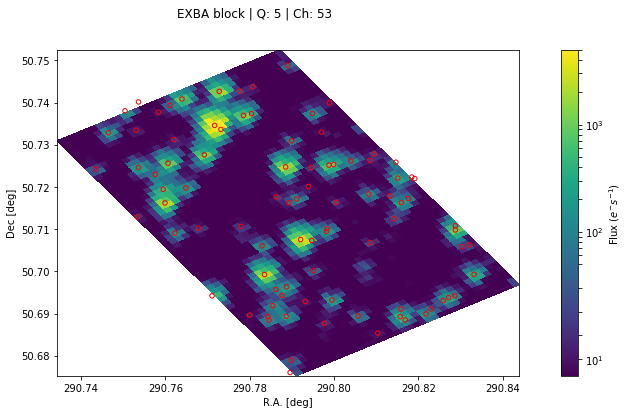

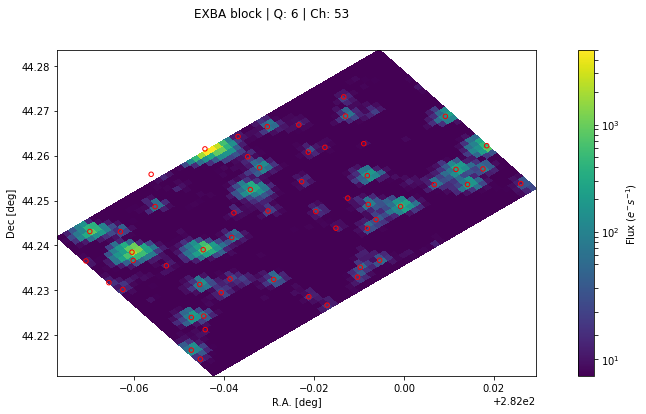

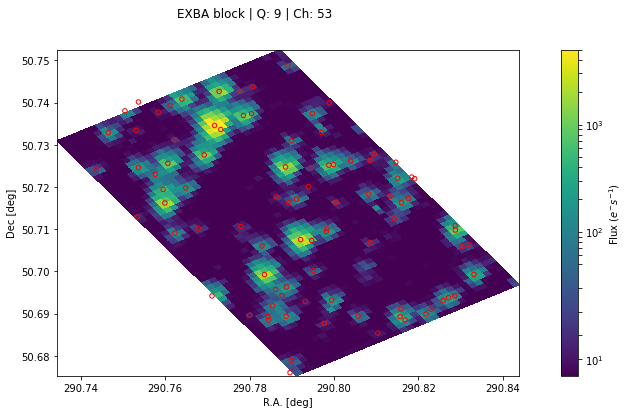

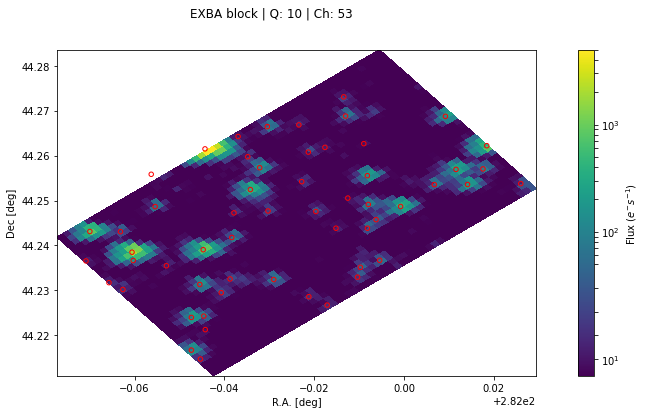

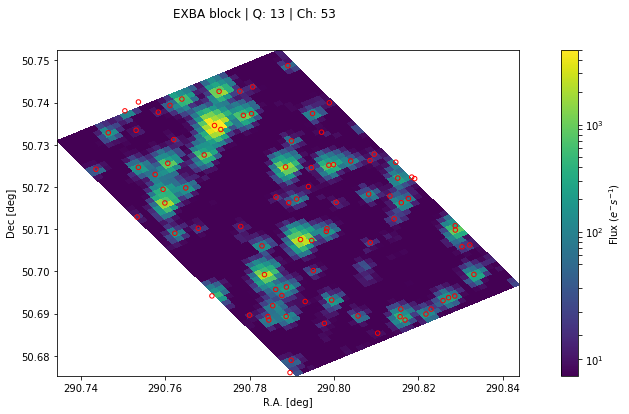

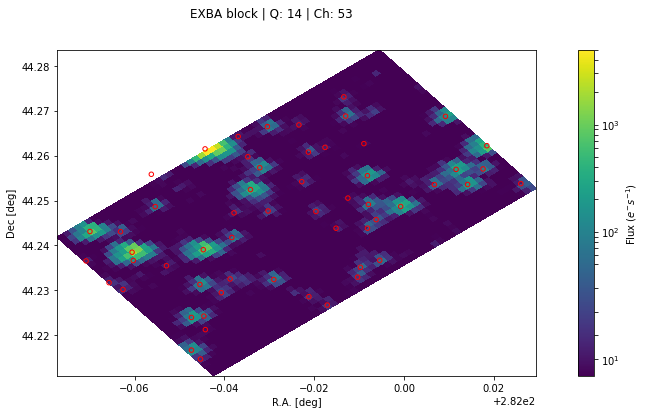

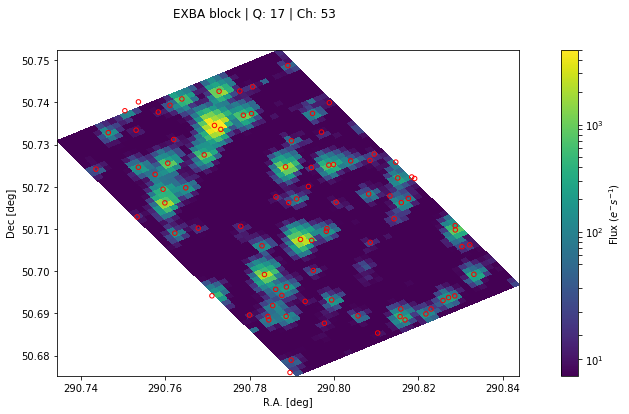

In [13]:
[exba.plot_image(space='wcs') for exba in exbas]

We now compute the light curves for all sources and quarters

In [14]:
for exba in exbas:
    exba.simple_aperture_phot()

Simple SAP flux:   0%|          | 0/4492 [00:00<?, ?it/s]

Simple SAP flux:   0%|          | 0/4276 [00:00<?, ?it/s]

Simple SAP flux:   0%|          | 0/4618 [00:00<?, ?it/s]

Simple SAP flux:   0%|          | 0/4447 [00:00<?, ?it/s]

Simple SAP flux:   0%|          | 0/4252 [00:00<?, ?it/s]

Simple SAP flux:   0%|          | 0/4344 [00:00<?, ?it/s]

Simple SAP flux:   0%|          | 0/1286 [00:00<?, ?it/s]

## EXBA Collection

To stitch light curves of the same objects across quarters we create an `EXBACollection` object, a subclass of `EXBA`.
This object has an attributes that contains a list of `lk.LightCurveCollection` objects per Gaia sources.

In [15]:
exba_lcc = EXBACollection(exbas)
exba_lcc

EXBA Patch:
	 Channel 53, Quarter [5, 6, 9, 10, 13, 14, 17], Gaia sources 145

We can access a Gaia sources by indexing the attribute `.sources`. Each element of this list has the same methods as the `lk.LightCurveCollection` class, such as `.plot()` and `.stitch()`.

time,flux,flux_err,cadenceno
,,,
object,float64,float64,int32
2455372.470671644,1.0042292211275023,0.00253245513863841,21070
2455372.491105597,1.0021339386237456,0.0025318637885016074,21071
2455372.51153965,1.0015340784760653,0.0025322284001767655,21072
2455372.5319735026,1.003726346423722,0.002532156611112842,21073
2455372.552407455,1.0017217504871707,0.0025319144138550177,21074
2455372.572841507,1.000396225229883,0.0025317698748493957,21075
2455372.5932753594,0.9983631549192329,0.002531700895970015,21076
2455372.613709311,1.0024798591260542,0.002532228682436434,21077


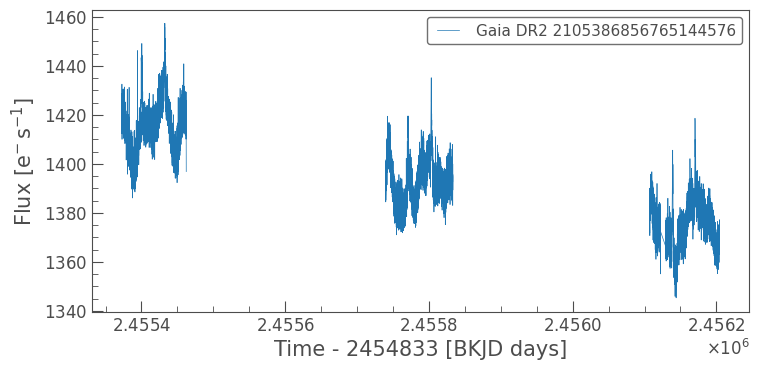

In [16]:
exba_lcc.source_lcs[10].plot()
exba_lcc.source_lcs[10].stitch()

## Apply CBVCorrector to all lightcurves

In [26]:
exba_lcc.apply_CBV()

Gaia sources:   0%|          | 0/145 [00:00<?, ?it/s]

/Users/jorgemarpa/.pyenv/versions/adap/lib/python3.8/site-packages/lightkurve/lightcurve.py:813: LightkurveWarning: The light curve appears to be zero-centered (median=-5.46e-01 electron / s +/- 2.07e+00 electron / s); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn("The light curve appears to be zero-centered "
/Users/jorgemarpa/.pyenv/versions/adap/lib/python3.8/site-packages/lightkurve/lightcurve.py:822: LightkurveWarning: The light curve has a negative median flux (-5.46e-01 electron / s); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn("The light curve has a negative median flux ({:.2e});"
/Users/jorgemarpa/.pyenv/versions/adap/lib/python3.8/site-packages/lightkurve/lightcurve.py:813: LightkurveWarning: The light curve appears to be zero-centered (median=-5.75e-01 electron / s +/- 2.06e+00 electron / s); `normalize()` will

In [27]:
exba_lcc.stitch_quarters()

/Users/jorgemarpa/.pyenv/versions/adap/lib/python3.8/site-packages/lightkurve/lightcurve.py:813: LightkurveWarning: The light curve appears to be zero-centered (median=-5.46e-01 electron / s +/- 2.07e+00 electron / s); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn("The light curve appears to be zero-centered "
/Users/jorgemarpa/.pyenv/versions/adap/lib/python3.8/site-packages/lightkurve/lightcurve.py:822: LightkurveWarning: The light curve has a negative median flux (-5.46e-01 electron / s); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn("The light curve has a negative median flux ({:.2e});"
/Users/jorgemarpa/.pyenv/versions/adap/lib/python3.8/site-packages/lightkurve/lightcurve.py:813: LightkurveWarning: The light curve appears to be zero-centered (median=4.91e-01 electron / s +/- 2.10e+00 electron / s); `normalize()` will 

[0.95827123 0.94644719 0.92416061]


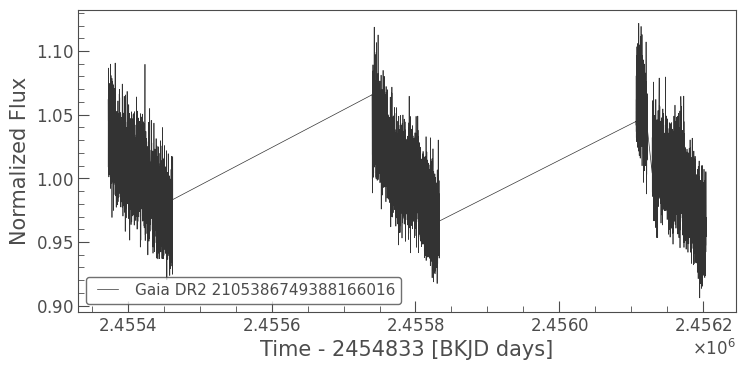

[0.96962335 0.96246519 0.94067137]


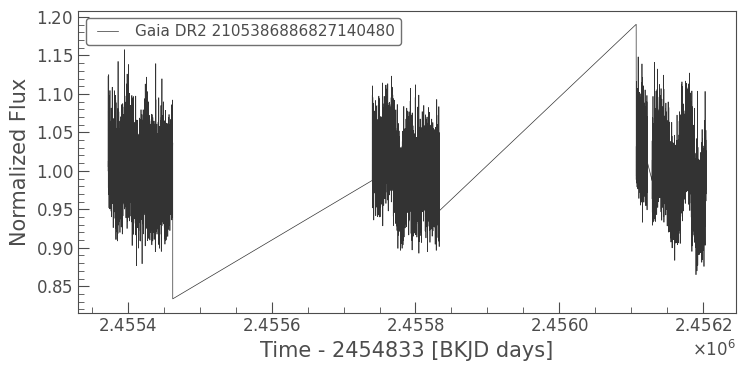

[0.97048659 0.97211486 0.96205212]


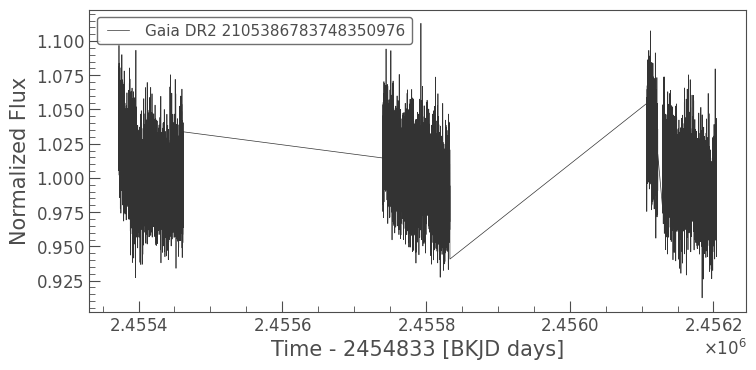

[0.96929297 0.96575028 0.95690643]


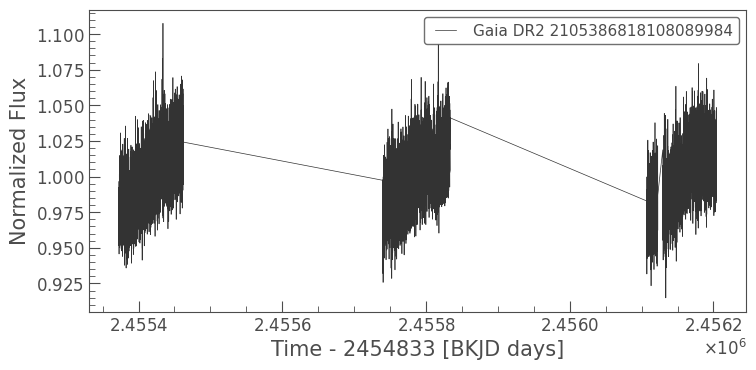

[0.97668634 0.97692098 0.96522636]


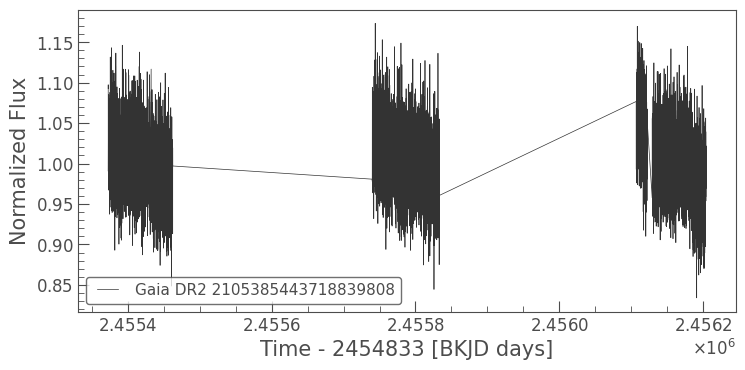

[0.98685945 0.9835337  0.98046358]


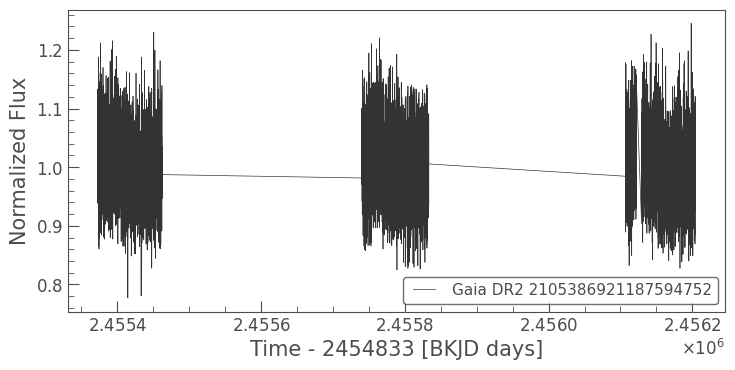

[0.83344823 0.80793125 0.79593354]


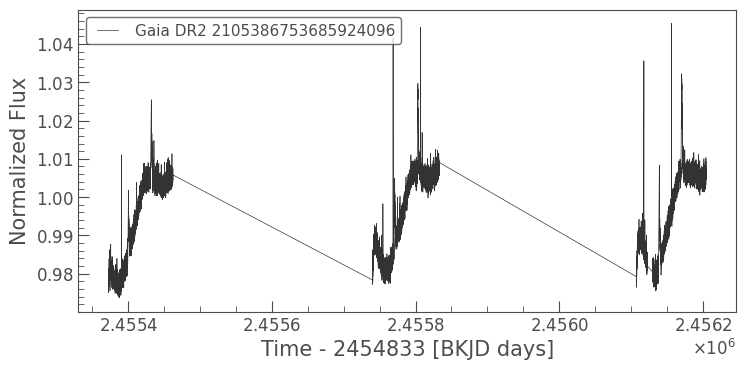

[0.94494841 0.93207631 0.90699901]


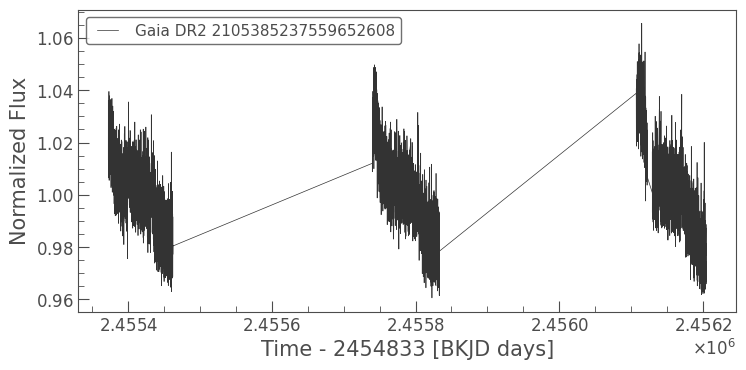

[0.53427277 0.32134724 0.4262037 ]


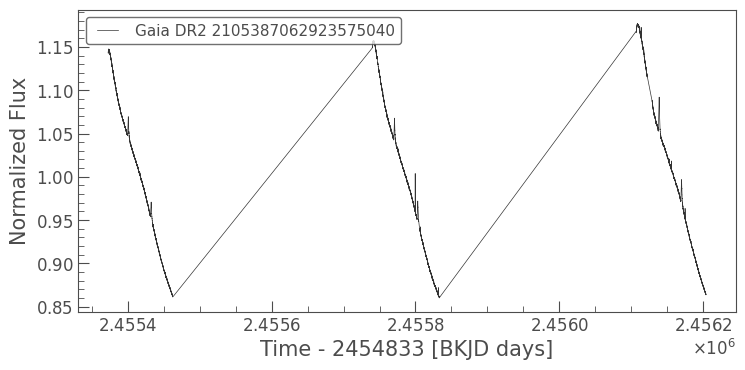

[0.98012599 0.9754614  0.96986126]


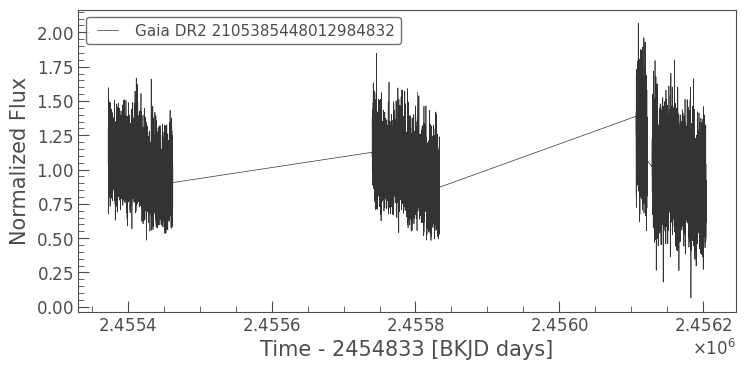

[0.82510888 0.88552649 0.88366199]


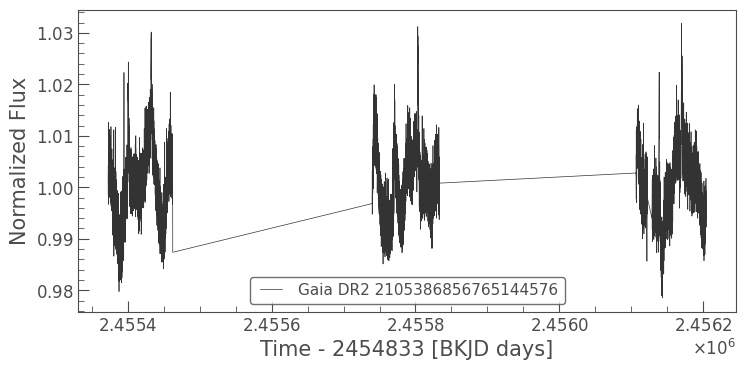

[0.98617872 0.99021332 0.9828441 ]


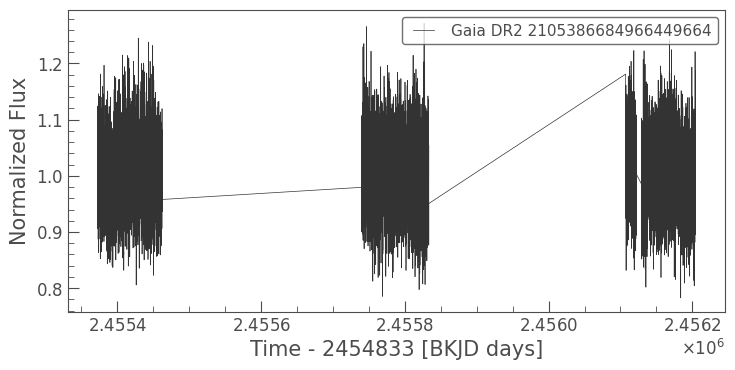

[0.92458994 0.9091009  0.90785835]


KeyboardInterrupt: 

In [36]:
for i, lc in enumerate(exba_lcc.stitched_lcs):
    #print(lc[0].label)
    print(exba_lcc.over_fitting_metrics[i])
    lc.plot(normalize=False)
    plt.show()